# Image Manipulation in Numpy
##### Adinda De Coster, Kurt Farasyn en Maia Francx De Gelder

## Deel 1

### Imports

In [1]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import os
import random

### Basis Functies

In [2]:
# functie om beeld om te zetten naar matrix - imagetomatrix (file)
def imagetomatrix (file) :
    image = Image.open(file)
    imagematrix = np.asarray(image)
    return imagematrix

In [3]:
# functie om (image)matrix horizontaal te spiegelen - fliphor (image)
def fliphor (image) :
    r = image.shape[0]
    k = image.shape[1]
    #print(r,k)
    image_fliphor = np.zeros(shape = (r,k,3), dtype=np.int32)
    for i in range(r) :
        for j in range(k) :
            image_fliphor[i,j] = image[i,(r-1-j)%r]        
    return image_fliphor

In [4]:
# functie om (image)matrix vertikaal te spiegelen - flipver (image)
def flipver (image) :
    r = image.shape[0]
    k = image.shape[1]
    #print(r,k)
    image_flipver = np.zeros(shape = (r,k,3), dtype=np.int32)
    for i in range(r) :
        for j in range(k) :
            image_flipver[i,j] = image[(k-1-i)%k,j]  
    return image_flipver

In [5]:
# functie om (image)matrix horizontaal en vertikaal te spiegelen - fliphorver (image)
def fliphorver (image) :
    r = image.shape[0]
    k = image.shape[1]
    #print(r,k)
    image_fliphorver = np.zeros(shape = (r,k,3), dtype=np.int32)
    image_fliphorver = flipver(fliphor(image))
    return image_fliphorver

In [6]:
# functie om 1 kleur van imagematrix (rgb) te bewaren - keepcolor (image,color)
# color = 0 of 1 of 2 
def keepcolor (image,color) :
    image_color = image.copy()
    if color == 0 : #keep red postitie 0:
        image_color[:,:,[1,2]] = 0
    elif color == 1 : #keep green postitie 1:
        image_color[:,:,[0,2]] = 0
    elif color == 2 : #keep blue postitie 2:
        image_color[:,:,[0,1]] = 0
    return image_color

In [7]:
# functie om wit + 1 kleur van imagematrix (rgb) te bewaren - keepcolor_w (image,color)
# color = 0 of 1 of 2 
def keepcolor_w (image,color) :
    image_color = image.copy()
    for i in range(image.shape[0]) :
        for j in range(image.shape[1]) :
            if not (image_color[i,j,0] == 255 and image_color[i,j,1] == 255 and image_color[i,j,2] == 255) :
                if color == 0 : #keep red postitie 0:
                    image_color[i,j,[1,2]] = 0
                elif color == 1 : #keep green postitie 1:
                    image_color[i,j,[0,2]] = 0
                elif color == 2 : #keep blue postitie 2:
                    image_color[i,j,[0,1]] = 0
    return image_color

In [8]:
# functie om 1 kleur van imagematric (rgb) te bewaren 
# color = r of g of b 
def keepcolor_rgb (image,color) :
    image_color = image.copy()
    if color == "r" : #keep red postitie 0:
        image_color[:,:,[1,2]] = 0
    elif color == "g" : #keep green postitie 1:
        image_color[:,:,[0,2]] = 0
    elif color == "b" : #keep blue postitie 2:
        image_color[:,:,[0,1]] = 0
    return image_color

In [9]:
# functie om 1 kleur van imagematric (rgb) te bewaren en tegelijkertijd te flippen
def colorflip (image, cf_type):
    image_cf = keepcolor_rgb (image, cf_type[0])
    
    if cf_type[1] == 1 :
        image_cf = fliphor (image_cf)
    elif cf_type[1] == 2 :
        image_cf = flipver (image_cf)
    elif cf_type[1] == 3 :
        image_cf = fliphover (image_cf)
        
    return image_cf

In [10]:
# functie om (image)matrix een factor te vergroten - larger (image,f)
def larger (image,f) :
    r = image.shape[0]
    k = image.shape[1]
    image_larger = np.zeros(shape = (r*f,k*f,3), dtype=np.int32)
    for i in range(image_larger.shape[0]) :
        for j in range(image_larger.shape[1]) :
            image_larger[i,j] = image[i//f,j//f]
    return image_larger

In [11]:
# functie om (image)matrix horizontaal te herhalen - repeat_k (image,fk)
def repeat_k (image,fk) : #k >= 2
    pict = image.copy()
    for j in range(1,fk) :
        pict = np.concatenate([pict, image], axis = 1)
    return pict 

In [12]:
# functie om (image)matrix vertikaal te herhalen - repeat_r (image,fr)
def repeat_r (image,fr) : #r >= 2
    pict = image.copy()
    for i in range(1,fr) :
        pict = np.concatenate([pict, image], axis = 0)
    return pict

### Advanced Functies

In [13]:
def grid_with_flips(image, matrix):
# The argument "matrix" is a matrix containing the type of flips that you do with your image.
# You could say 0 for you image not flipped, 1 for flipping your image left right, 2 for flipping it upside down, 
# and 3 for flipping it both left right and upside down.    

    #Convert image to array
    image_array = np.array(image)
    
    #Calculate number of rows and columns
    matrix = list(matrix)
    num_rows = len(matrix)
    num_cols = len(matrix[0]) 
    
    #Create empty matrix
    flipped_images = []
    

    for row in range(num_rows):
        for col in range(num_cols):
            #Coördinates of each flip type
            flip_type = matrix[row][col]
            
             #Assign flip types
            if flip_type == 0:
                flipped_image = image_array
            elif flip_type == 1:
                flipped_image = np.fliplr(image_array)
            elif flip_type == 2:
                flipped_image = np.flipud(image_array)
            elif flip_type == 3:
                flipped_image = np.flipud(np.fliplr(image_array))
            
            #Append all images
            flipped_images.append(flipped_image)
            
    # Create subplots to display each flipped image
    num_images = len(flipped_images)
    rows = int(np.ceil(num_images / num_cols))
    fig, axes = plt.subplots(rows, num_cols, figsize=(5*num_cols, 5*rows))
    
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            ax.imshow(flipped_images[i])
            ax.set_axis_off()
        else:
            ax.axis('off')

In [14]:
def create_colorful_big_one(image, colors):
# The argument "colors" is a list of colors (starting left top and rotating clockwise).

    # Convert to numpy array
    image_array = np.array(image)
    
    # Define colors
    red_image = keepcolor (image_array,0)
    green_image = keepcolor (image_array,1)
    blue_image = keepcolor (image_array,2)
    color_maps = {'r': red_image, 'g': green_image, 'b': blue_image}
    
    # Function image with single color
    def create_single_color_image(color):
        return np.full_like(image_array, color_maps[color])
    
    # Stacked row
    left = np.concatenate([create_single_color_image(color) for color in colors[4:6]], axis=0)
    right = np.concatenate([create_single_color_image(color) for color in colors[-2:]], axis=0)
    
         
    # Doubled image
    double = larger(image_array, 2)
    
    # Define rows
    row1 = [create_single_color_image(color) for color in colors[:4]]
    row2 = np.concatenate((left, double, right), axis=1)
    row3 = [create_single_color_image(color) for color in colors[6:10]]

    # Combine rows
    combined_image = np.concatenate([np.concatenate(row1, axis=1), row2, np.concatenate(row3, axis=1)], axis=0)

    # Show the combined image
    plt.imshow(combined_image)

In [15]:
def square_colorsflips (image, n) :
     
    lst = ["r0", "r1", "r2", "r3", "g0", "g1", "g2", "g3", "b0", "b1", "b2", "b3"]
    random_colorsflips = [lst[random.randrange(len(lst))] for i in range(4*n-4)]
    print ("List of random manipulations : ")
    print (random_colorsflips)
    
    #top : n pictures left to right, so from listposition 0 till n-1
    top = colorflip (image, random_colorsflips[0])
    for i in range(1,n) :
        top = np.concatenate([top, colorflip (image, random_colorsflips[i])], axis = 1)
    #plt.imshow(top)

    #right : n-2 pictures top to down, so from listposition n till n+(n-2)-1
    right = colorflip (image, random_colorsflips[n])
    for i in range(n+1,n+(n-2)) :
        right = np.concatenate([right, colorflip (image, random_colorsflips[i])], axis = 0)
    #plt.imshow(right)
        
    #botton : n pictures left to right, so OPPOSITE from listposition n+(n-2) till n+(n-2)+n-1
    #botton : n pictures left to right, so BACKWARDS from listposition n+(n-2)+n-1 till n+(n-2)
    botton = colorflip (image, random_colorsflips[n+(n-2)+n-1])
    for i in range(n+(n-2)+n-1-1, n+(n-2)-1, -1) :
         botton = np.concatenate([botton, colorflip (image, random_colorsflips[i])], axis = 1)
    #plt.imshow(botton)
        
    #left : n-2 pictures down to top, so OPPOSITE from listposition n+(n-2)+n till n+(n-2)+n+(n-2)-1
    #left : n-2 pictures down to top, so BACKWARDS from listposition n+(n-2)+n+(n-2)-1 till n+(n-2)+n
    left = colorflip (image, random_colorsflips[n+(n-2)+n+(n-2)-1])
    for i in range(n+(n-2)+n+(n-2)-1-1, n+(n-2)+n-1, -1) :
        left = np.concatenate([left, colorflip (image, random_colorsflips[i])], axis = 0)
    #plt.imshow(left)
    
    
    image_square_colorsflips = np.concatenate([top,
                                               np.concatenate([left, larger(image, n-2), right], axis = 1),
                                               botton], axis = 0)
    plt.imshow(image_square_colorsflips)
    #return image_square_colorsflips

In [16]:
#functie om (image)matrix horizontaal te knippen
def cuthor (image, nb_pieces, line_thickness, line_color) :
    hbar = np.zeros(shape = (line_thickness, image.shape[1], 3), dtype=np.int32) 
    for i in range(line_thickness) :
        for j in range(image.shape[1]) :
            hbar[i,j] = line_color
    #plt.imshow(hbar)     

    to_cut = image.copy()
    image_cuthor = hbar.copy()
    for i in range(1, nb_pieces) :
        cut, to_cut = np.split(to_cut, [round(image.shape[0] / nb_pieces)], axis = 0) #horizontaal knippen 
        image_cuthor = np.concatenate([image_cuthor, cut, hbar], axis = 0)
        #print(i, cut.shape, to_cut.shape, image_cuthor.shape)
    x, image_cuthor = np.split(np.concatenate([image_cuthor, to_cut], axis = 0), [line_thickness], axis = 0)
    return image_cuthor


#functie om (image)matrix vertikaal te knippen
def cutver (image, nb_pieces, line_thickness, line_color) :
    vbar = np.zeros(shape = (image.shape[0], line_thickness, 3), dtype=np.int32) 
    for i in range(image.shape[0]) :
        for j in range(line_thickness) :
            vbar[i,j] = line_color
    #plt.imshow(vbar)     

    to_cut = image.copy()
    image_cutver = vbar.copy()
    for i in range(1, nb_pieces) :
        cut, to_cut = np.split(to_cut, [round(image.shape[1] / nb_pieces)], axis = 1) #vertikaal knippen 
        image_cutver = np.concatenate([image_cutver, cut, vbar], axis = 1)
        #print(i, cut.shape, to_cut.shape, image_cutver.shape)
    x, image_cutver = np.split(np.concatenate([image_cutver, to_cut], axis = 1), [line_thickness], axis = 1)
    return image_cutver


#functie om (image)matrix horizontaal & vertikaal te knippen
def cuthorver (image, nb_horpieces, nb_verpieces, line_thickness, line_color) :
    hbar = np.zeros(shape = (line_thickness, image.shape[1] + (nb_verpieces-1)*line_thickness, 3), dtype=np.int32) 
    for i in range(line_thickness) :
        for j in range(image.shape[1] + (nb_verpieces-1)*line_thickness) :
            hbar[i,j] = line_color
    #print("hbar", hbar.shape)
    #plt.imshow(hbar)     

    to_cut = image.copy()
    image_cuthorver = hbar.copy()
    
    for i in range(1, nb_horpieces) :
        cut, to_cut = np.split(to_cut, [round(image.shape[0] / nb_horpieces)], axis = 0) #horizontaal knippen
        #print("a", i, cut.shape, to_cut.shape, image_cuthorver.shape)
        cut = cutver(cut, nb_verpieces, line_thickness, line_color) #hstrook i vertikaal knippen
        #print("b", i, cut.shape, to_cut.shape, image_cuthorver.shape)
        image_cuthorver = np.concatenate([image_cuthorver, cut, hbar], axis = 0)
        #print("c", i, cut.shape, to_cut.shape, image_cuthorver.shape)
    
    to_cut = cutver(to_cut, nb_verpieces, line_thickness, line_color) #laatste hstrook vertikaal knippen
    #print("d", i, cut.shape, to_cut.shape, image_cuthorver.shape)
    
    x, image_cuthorver = np.split(np.concatenate([image_cuthorver, to_cut], axis = 0), [line_thickness], axis = 0)
    #print("e", i, cut.shape, to_cut.shape, image_cuthorver.shape)
    
    return image_cuthorver  

## Deel 2: Hoofdprogramma

### Kies je afbeelding

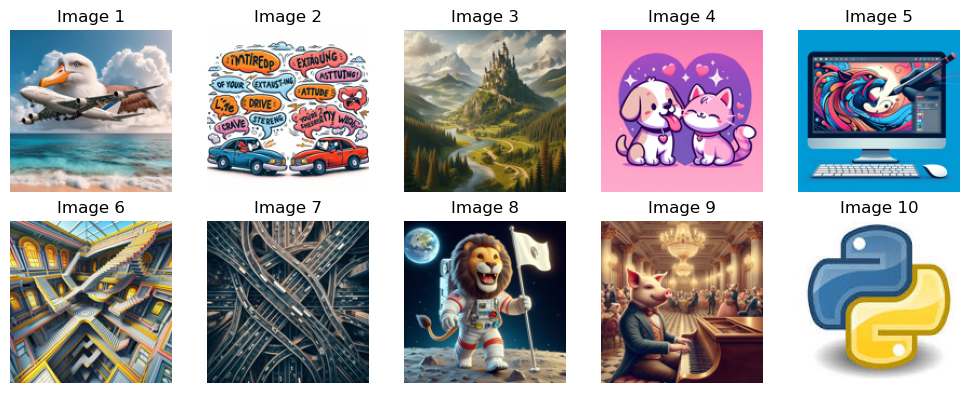

Choose an image: 65
Please enter a number between 1 and 10.
Choose an image: 5
You have chosen image: 5


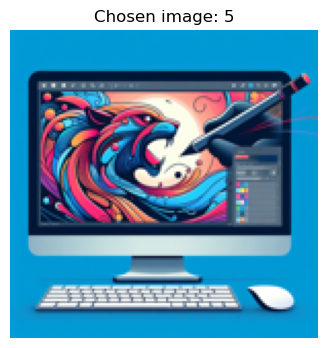

In [17]:
# Create list of 10 images
image1 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\ALbatros.jpg'))
image2 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\Cars.jpg'))
image3 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\Castle.jpg'))
image4 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\Catdog.jpg'))
image5 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\Coputer-image.jpg'))
image6 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\Escher.jpg'))
image7 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\Highway.jpg'))
image8 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\Lion.jpg'))
image9 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\piano_pig.jpg'))
image10 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\python.jpg'))

sample_images = [image1, image2, image3, image4, image5, image6, image7, image8, image9, image10]
for i in sample_images:
    max_size = (150, 150)
    i.thumbnail(max_size)

# Display images
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axs.flat):
    if i < len(sample_images):
        ax.imshow(sample_images[i])
        ax.set_title(f"Image {i+1}")
        ax.axis('off')

plt.tight_layout()
plt.show()

# Ask input
chosen_image_number = int(input("Choose an image: "))

# Check input
while (1 <= chosen_image_number <= 10) == False :
    print("Please enter a number between 1 and 10.")
    chosen_image_number = int(input("Choose an image: "))
    

# Confirm choice input
chosen_image = sample_images[chosen_image_number - 1]
print(f"You have chosen image: {chosen_image_number}")
plt.figure(figsize=(5, 4))
plt.imshow(chosen_image)
plt.title(f"Chosen image: {chosen_image_number}")
plt.axis('off')

    
#Convert chosen image to array
chosen_image_array = np.array(chosen_image)

### Opdracht Stap 4 : Opgelegde manipulaties

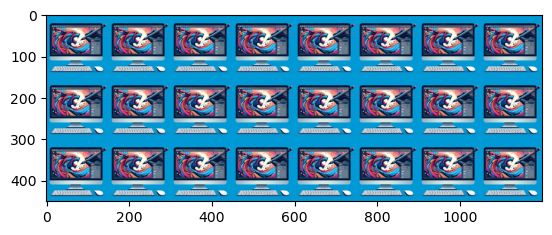

In [18]:
#3x8
chosen_image_k8r3 = repeat_k (repeat_r (chosen_image_array,3),8)
plt.imshow(chosen_image_k8r3)

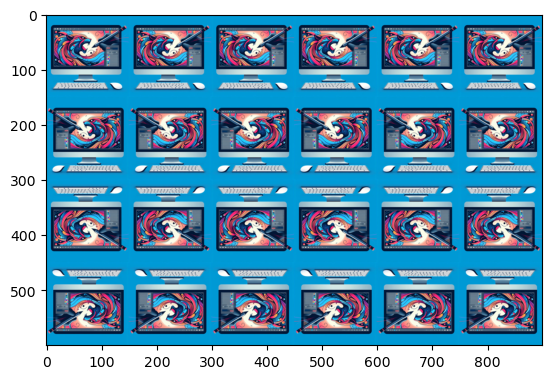

In [19]:
#4x6
chosen_image_k6r4 = repeat_k (np.concatenate([chosen_image_array, (fliphor (chosen_image_array)), (flipver (chosen_image_array)), (fliphorver (chosen_image_array))], axis = 0),6)
plt.imshow(chosen_image_k6r4)

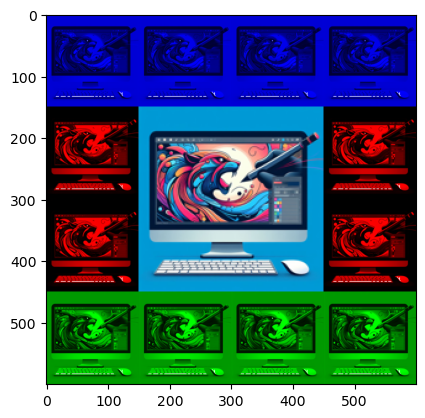

In [20]:
#4x4
chosen_image_array_redw = keepcolor_w (chosen_image_array,0)
chosen_image_array_greenw = keepcolor_w (chosen_image_array,1)
chosen_image_array_bluew = keepcolor_w (chosen_image_array,2)
pict2a = repeat_k (chosen_image_array_bluew, 4)
pict2c = repeat_k (chosen_image_array_greenw, 4)
pict2b = np.concatenate([repeat_r (chosen_image_array_redw, 2), larger (chosen_image_array, 2), repeat_r (chosen_image_array_redw, 2)], axis = 1)
pict2 = np.concatenate([pict2a, pict2b, pict2c], axis = 0)
plt.imshow(pict2)

### Opdracht Stap 5 : Generalize

**Grid with flips**

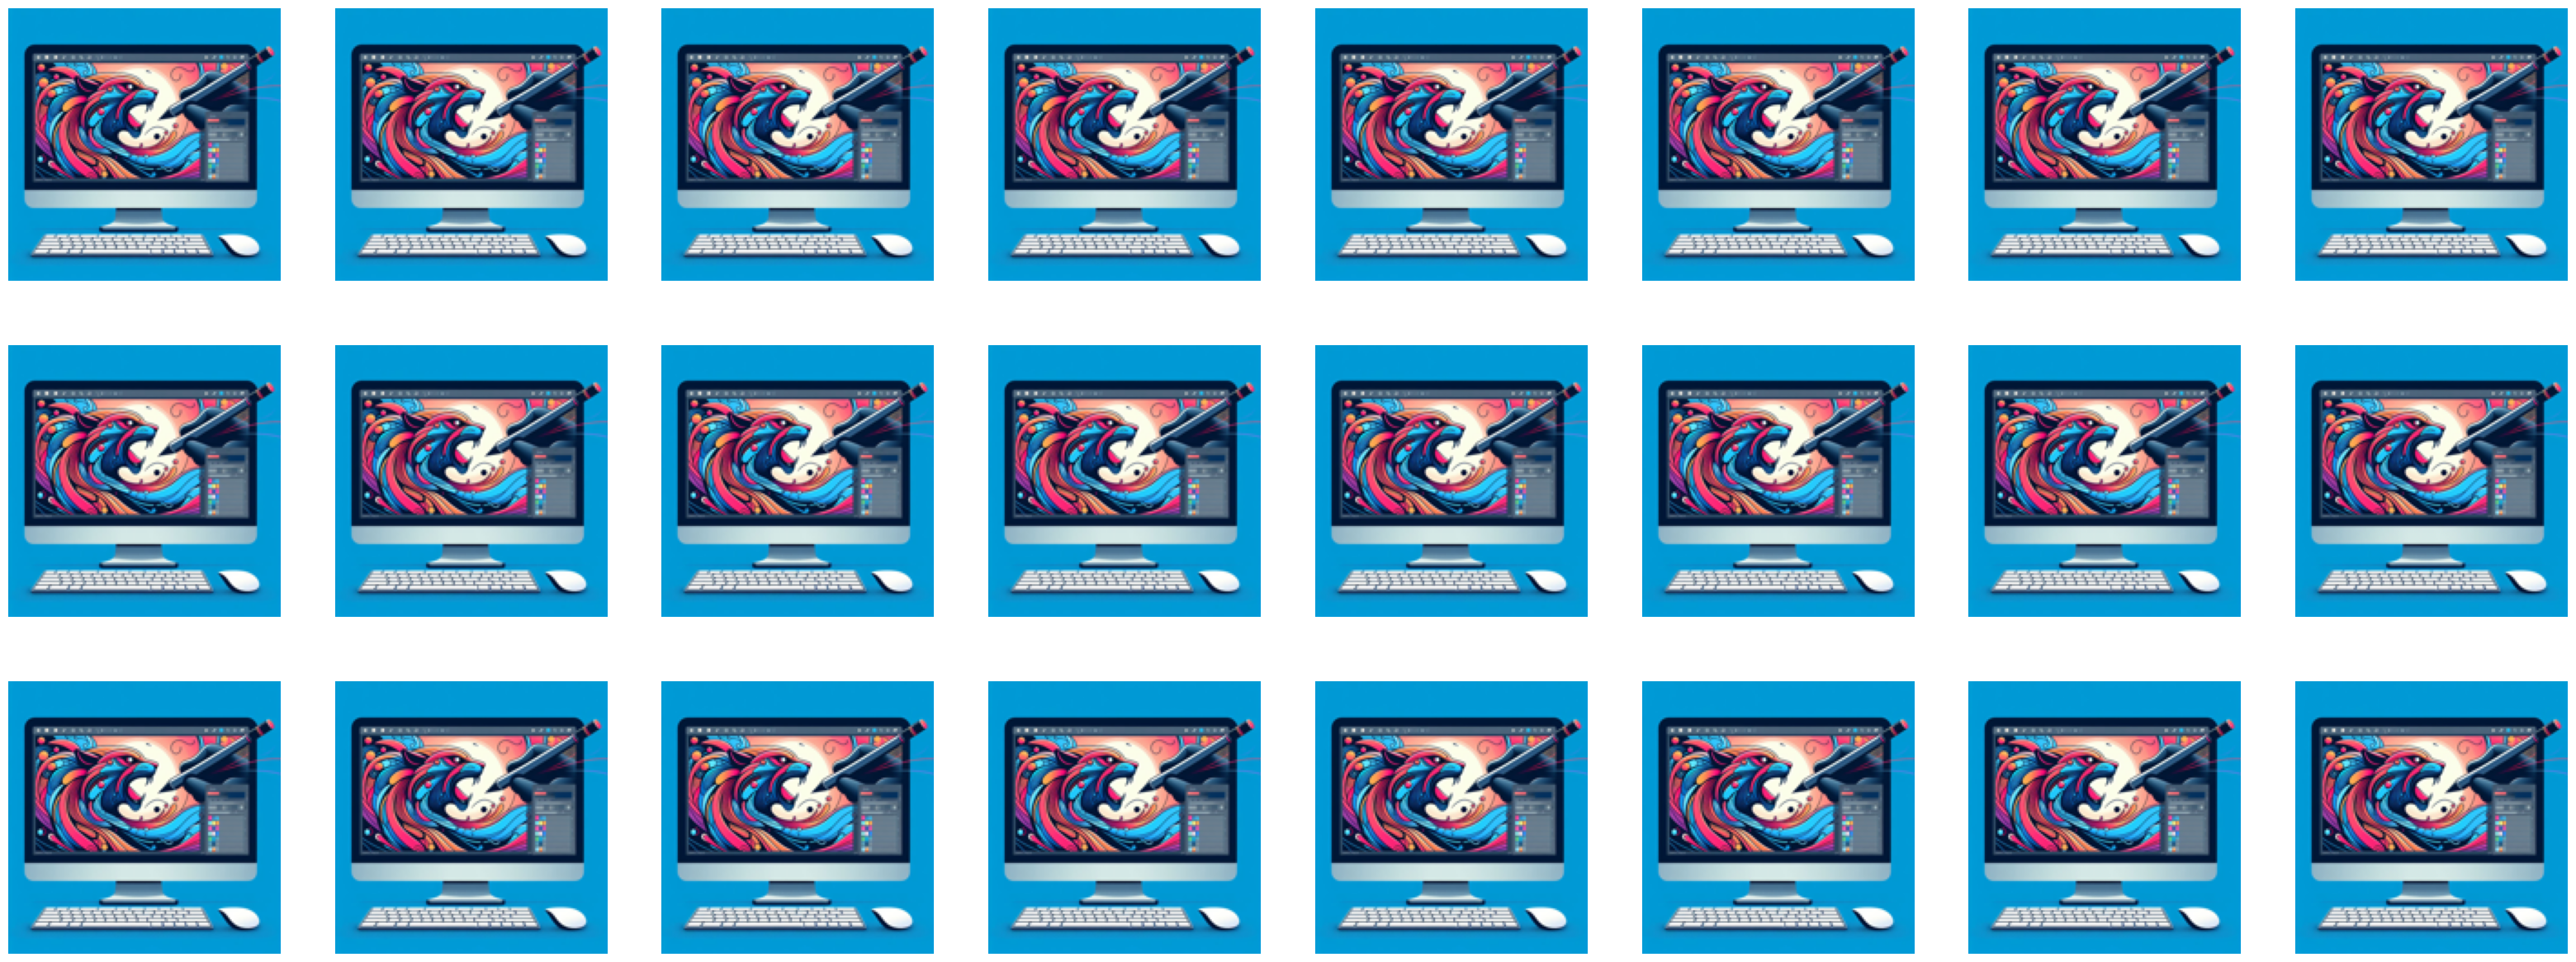

In [21]:
#3x8
grid_with_flips(chosen_image, ([0 for i in range(8)] for j in range(3)))

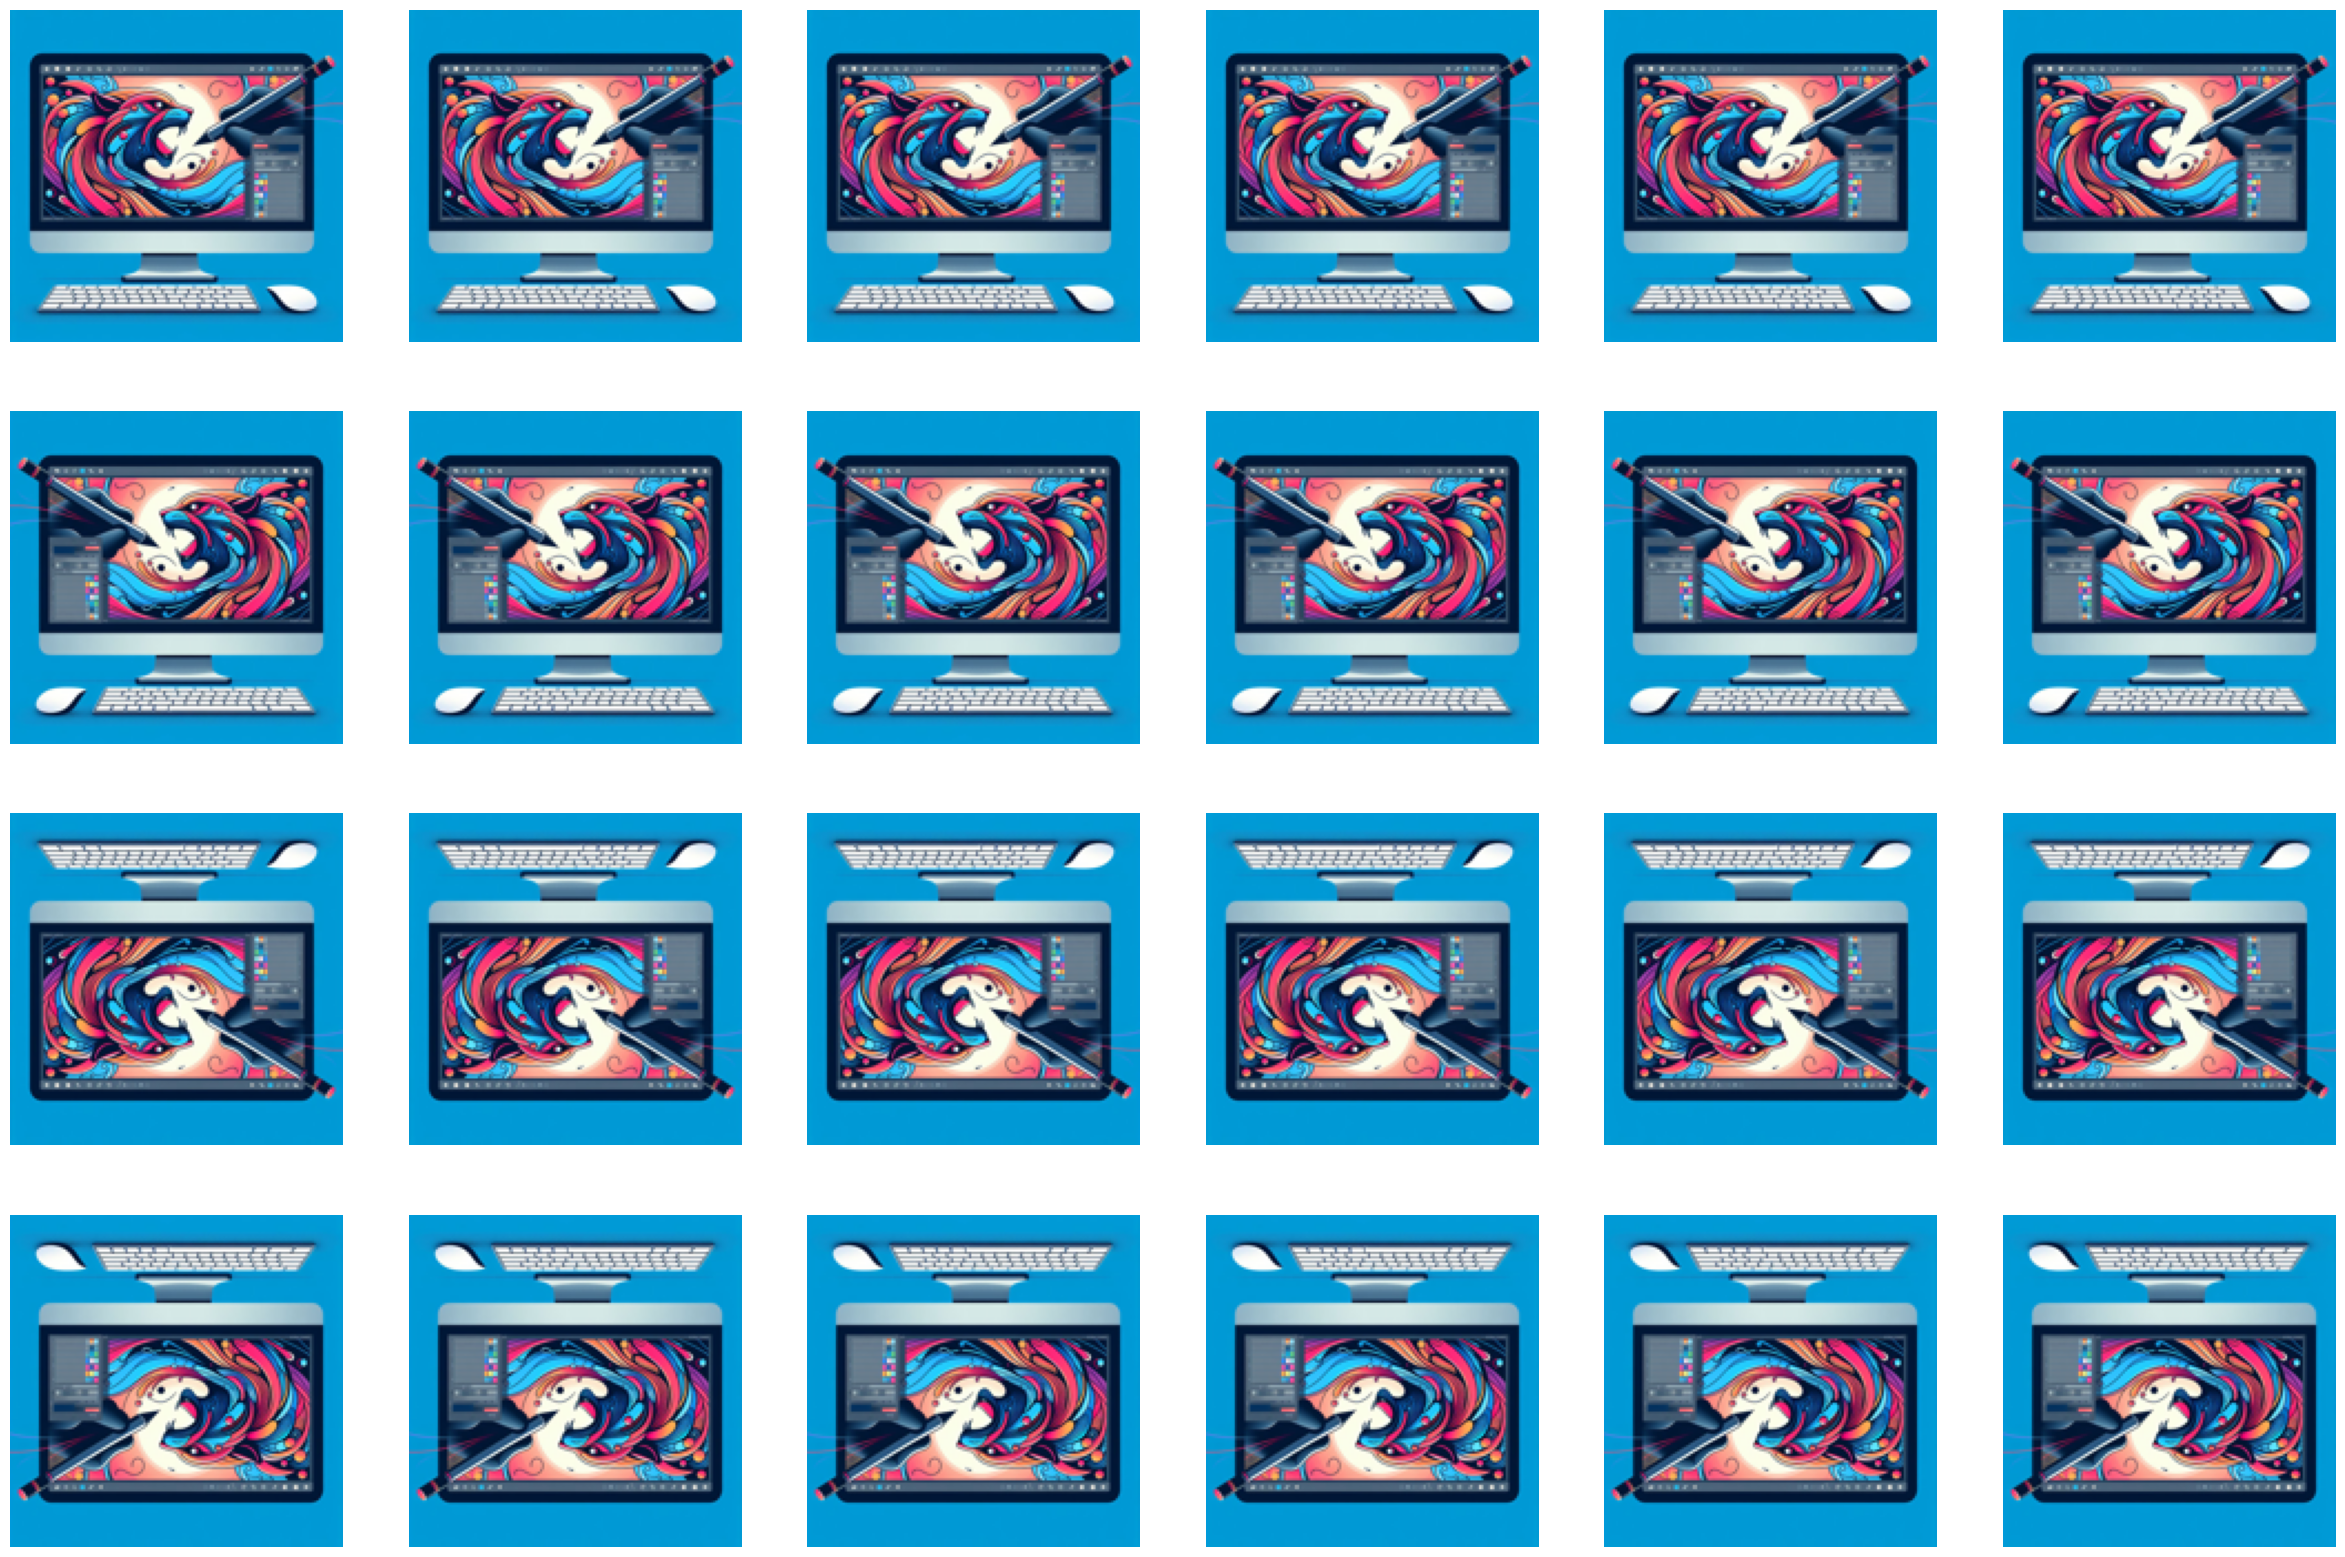

In [22]:
#4x6
grid_with_flips(chosen_image, ([j for i in range(6)] for j in range(4)))

**Colorful Big one**

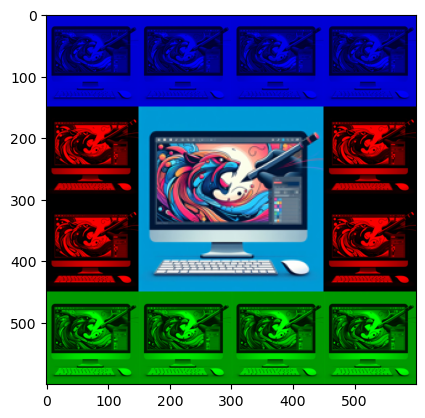

In [23]:
#4x4
create_colorful_big_one(chosen_image,['b', 'b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'r','r'])

**Combine Colorful Big one / Grid with flips**
- You will be asked to choose the dimension (n) of the square of manipulations.
- The program will generate a list of length 4*n-2 of manipulations.
- Finally, the program will plot the square of manipulations with a large original image in the middle. 

Choose the dimension (min 3, max 20) of the square of manipulations: 9
List of random manipulations : 
['g1', 'b2', 'g0', 'g3', 'g2', 'g1', 'r3', 'r2', 'b2', 'g3', 'r3', 'r1', 'b3', 'b2', 'r3', 'g3', 'g3', 'r0', 'g2', 'g2', 'b0', 'g1', 'b0', 'g2', 'b0', 'r3', 'r0', 'g1', 'g1', 'g0', 'b3', 'g2']


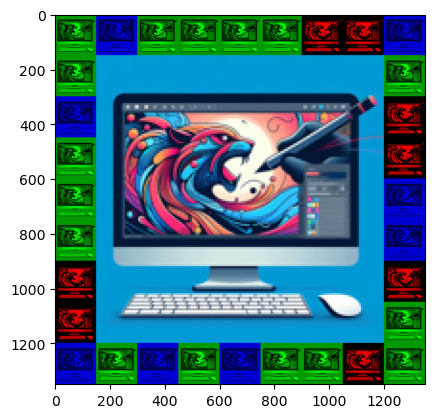

In [24]:
# Ask input
dim = int(input("Choose the dimension (min 3, max 20) of the square of manipulations: "))

# Check input
while (3 <= dim <= 20) == False :
    print("Please enter a number between 3 and 20.")
    dim = int(input("Choose the dimension (min 3, max 20) of the square of manipulations: "))
    
#print(type(chosen_image))
square_colorsflips (chosen_image_array, dim)


### Opdracht Stap 6 : Eigen manipulaties

**Knippen**
- Horizontaal in 15 stukken
- Vertikaal in 4 stukken
- Horizontaal & vertikaal in 10 stukken --> 100 stukjes 

(290, 150, 3)


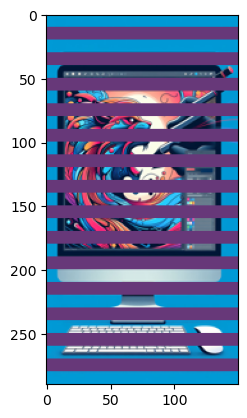

In [25]:
chosen_image_cuthor = cuthor(chosen_image_array, 15, 10, [103,56,121])
plt.imshow(chosen_image_cuthor)
print(chosen_image_cuthor.shape)

(150, 180, 3)


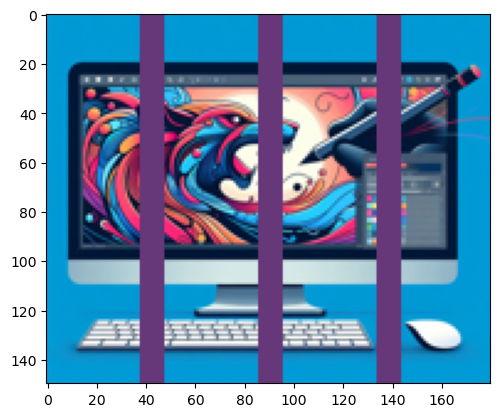

In [26]:
chosen_image_cutver = cutver(chosen_image_array, 4, 10, [103,56,121])
plt.imshow(chosen_image_cutver)
print(chosen_image_cutver.shape)

(168, 168, 3)


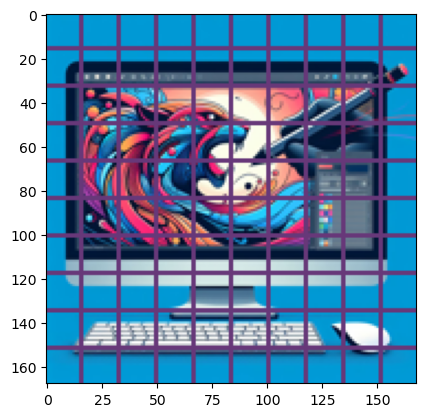

In [27]:
chosen_image_cuthorver = cuthorver(chosen_image_array, 10, 10, 2, [103,56,121])
plt.imshow(chosen_image_cuthorver)
print(chosen_image_cuthorver.shape)

**Valentine** 